# Social Media Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Initial State ---
A = np.array([
    [0.8, 0.3, 0.0, 0.4],
    [0.2, 0.7, 0.0, 0.1],
    [0.0, 0.0, 1.0, 0.4],
    [0.0, 0.0, 0.0, 0.1]
])

x0 = np.array([110, 60, 10, 140], dtype=float)

In [ ]:
# --- Simulator Function ---
def simulate(A, x0, tol=1e-1, max_steps=1000):
    xs = [x0]
    for _ in range(max_steps):
        x_next = A @ xs[-1]
        xs.append(x_next)
        if np.linalg.norm(x_next - xs[-2], 1) < tol:
            break
    return np.array(xs)


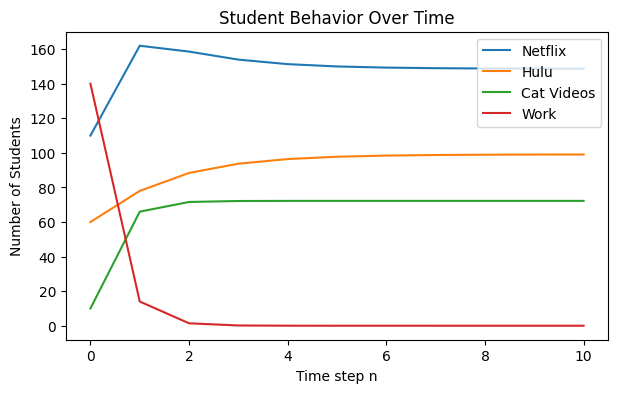

Total students (should be constant): [320. 320. 320. 320. 320. 320. 320. 320. 320. 320. 320.]
Constant total = 320.0
Steady state vector x̂ = [1.48708659e+02 9.90691189e+01 7.22222222e+01 1.40000000e-08]
Proportions = [4.64714559e-01 3.09590997e-01 2.25694444e-01 4.37500000e-11]


In [ ]:
# --- Part (d): Run Simulation ---
xs = simulate(A, x0)
n = np.arange(len(xs))

# Plot trajectories
plt.figure(figsize=(7,4))
plt.plot(n, xs[:,0], label='Netflix')
plt.plot(n, xs[:,1], label='Hulu')
plt.plot(n, xs[:,2], label='Cat Videos')
plt.plot(n, xs[:,3], label='Work')
plt.xlabel('Time step n')
plt.ylabel('Number of Students')
plt.title('Student Behavior Over Time')
plt.legend()
plt.show()

# Check conservation
S = xs.sum(axis=1)
print("Total students (should be constant):", S)
print("Constant total =", S[0])

x_hat = xs[-1]
print("Steady state vector x̂ =", x_hat)
print("Proportions =", x_hat / x_hat.sum())


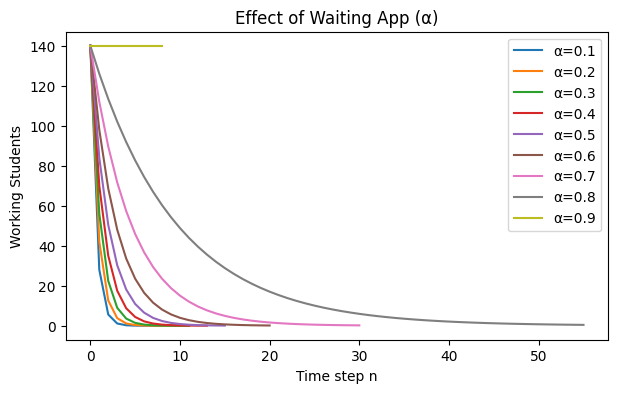

In [ ]:
# --- Part (e): Waiting App (vary α) ---
def make_A_alpha(alpha):
    A_mod = A.copy()
    w = np.array([0.4 - alpha/0.9 * 0.4,
                  0.1 - alpha/0.9 * 0.1,
                  0.4 - alpha/0.9 * 0.4,
                  0.1 + alpha/0.9 * 0.9])
    A_mod[:,3] = w
    return A_mod

alphas = np.arange(0.1, 1.0, 0.1)
plt.figure(figsize=(7,4))
for alpha in alphas:
    xs_alpha = simulate(make_A_alpha(alpha), x0)
    plt.plot(xs_alpha[:,3], label=f'α={alpha:.1f}')
plt.xlabel('Time step n')
plt.ylabel('Working Students')
plt.title('Effect of Waiting App (α)')
plt.legend()
plt.show()


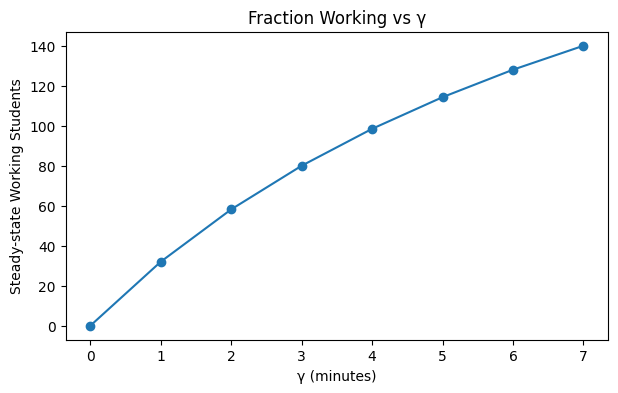

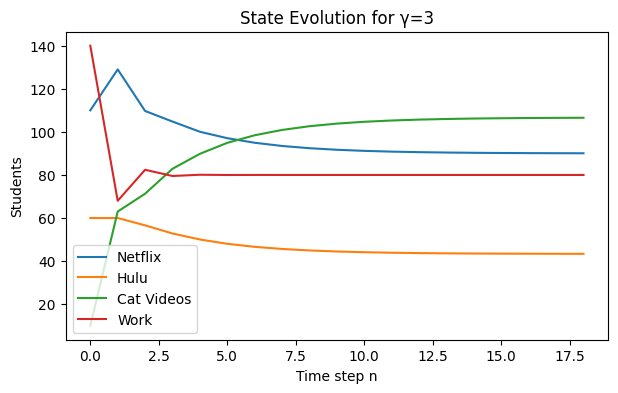

Steady-state proportions for γ=0.7:
[0.28146373 0.13555915 0.33297712 0.25      ]


In [ ]:
# --- Part (f): Blocking App (vary γ) ---
def make_A_gamma(gamma):
    return np.array([
        [0.8 - gamma / 10, 0.3, 0.0, 0.4],
        [0.2, 0.7 - gamma / 10, 0.0, 0.1],
        [0.0, 0.0, 1 - gamma / 10, 0.4],
        [gamma / 10, gamma / 10, gamma / 10, 0.1]
    ])

gammas = np.arange(0, 7.1, 1)
steady_W = []
for g in gammas:
    xs_g = simulate(make_A_gamma(g), x0)
    steady_W.append(xs_g[-1,3])

plt.figure(figsize=(7,4))
plt.plot(gammas, steady_W, marker='o')
plt.xlabel('γ (minutes)')
plt.ylabel('Steady-state Working Students')
plt.title('Fraction Working vs γ')
plt.show()

γ = 3
xs_gamma = simulate(make_A_gamma(γ), x0)
plt.figure(figsize=(7,4))
plt.plot(xs_gamma[:,0], label='Netflix')
plt.plot(xs_gamma[:,1], label='Hulu')
plt.plot(xs_gamma[:,2], label='Cat Videos')
plt.plot(xs_gamma[:,3], label='Work')
plt.xlabel('Time step n')
plt.ylabel('Students')
plt.title(f'State Evolution for γ={γ}')
plt.legend()
plt.show()

print("Steady-state proportions for γ=0.7:")
print(xs_gamma[-1] / xs_gamma[-1].sum())

# Labeling Patients

In [40]:
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

In [41]:
#Calculate the coefficients using the train set
trans = A.T
sqr = trans.dot(A)
pseudoinv = (np.linalg.inv(sqr)).dot(trans)
x = pseudoinv.dot(b)
print(x)

[[ 0.12131475]
 [-0.15253102]
 [-0.36111722]
 [-0.06427341]
 [ 0.95936096]]


In [42]:
#Test if these coefficients give the correct answer for the train set
b_new = np.sign(A.dot(x))
print(b - b_new)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [43]:
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

In [39]:
#Use your alpha coefficients on the test set and check their acuracy
b_calc = np.sign(A_test.dot(x))
print(b_calc)
print(b_calc - b_test)

[[1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [2.]
 [0.]]
